# Taller 3 Óptica. Implementación de la Transformada de Fourier Computacional 

In [ ]:
# Librerías
import numpy as np 
import matplotlib.pyplot as plt
import scipy.fft as sft      


## Ejercicio 3.1 Triangle function M-file:

### ***a)*** Create a triangle function in a M-file. Try some lines like: 
$T = 1 - abs(x)$

$ask = abs(x) <=1$

$out =t *mask$

Claramente está es la idea que nos da MATLAB, tratemos de implementarlo en python. 

Sabemos que la función triangulo se define como: 
$$\Lambda (x) =\left\{\begin{matrix}
1 - |x| & if |x|\leq 1   \\ 
0 & otherwise   
\end{matrix}\right.$$


In [ ]:
def triangle_function(x,a): #Creación de la función triángulo 
  T = np.zeros(len(x))
  t = np.zeros(len(x)) 
  for i in range(0,len(x)):
    if abs(a*x[i])<=1: 
      t[i] = 1 - abs(a*x[i])
      T[i]= t[i]
    elif abs(a*x[i])>1:
      T[i]= 0
  
  return T


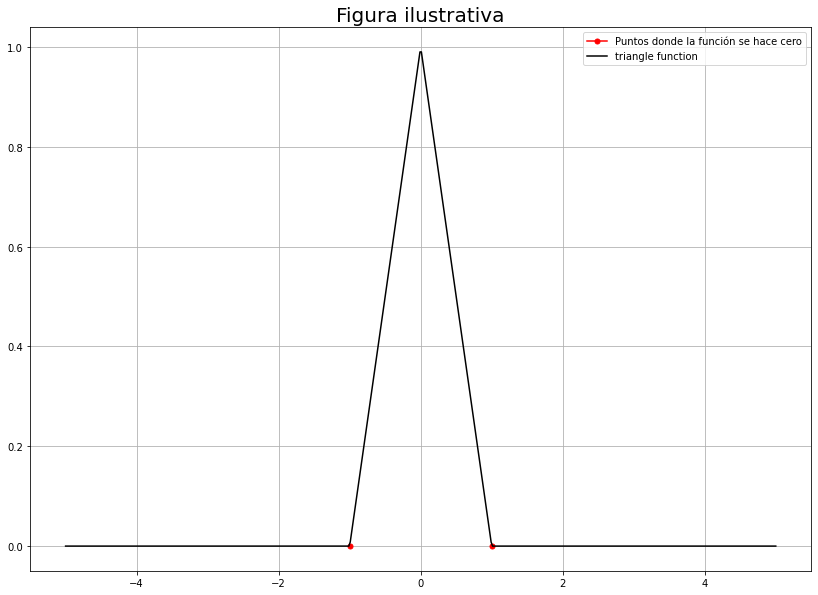

In [ ]:
x = np.linspace(-5,5,500)
f = triangle_function(x,1)


plt.figure(figsize=(14,10))
plt.title('Figura ilustrativa',fontsize=20)
plt.plot(-1, 0,'o-', markersize=5,color='red', label='Puntos donde la función se hace cero')
plt.plot(1, 0,'o-', markersize=5,color='red')
plt.grid()
plt.plot(x,f,color='black', label='triangle function')
plt.legend()

### ***b)*** In a script, create a sampled triangle function using the following specifications: triangle base half width $= 0.1 m$, vector length $= 2 m$, and number of samples $M = 200$

In [ ]:
#Las unidades están en metros

ancho_medio = 0.1  # base half width
Lx = 2             #Vector length 
M = 200            # Number of samples

#Realicemos el muestreo de nuestra función: 

dx = Lx/M 
xmin = - Lx/2 
xmax = Lx/2

x= np.arange(xmin, xmax, dx) #Vector en coord. Espaciales

fxmin = -1/(2*dx)
fxmax = 1/(2*dx)
df = 1/(Lx)

fx = np.arange(fxmin, fxmax,df) #Verctor en coord. frecuenciales

Ya con esto tenemos la función muestreada, sigue el punto siguiente que es graficarla. 

### ***c)*** Plot the sampled function.

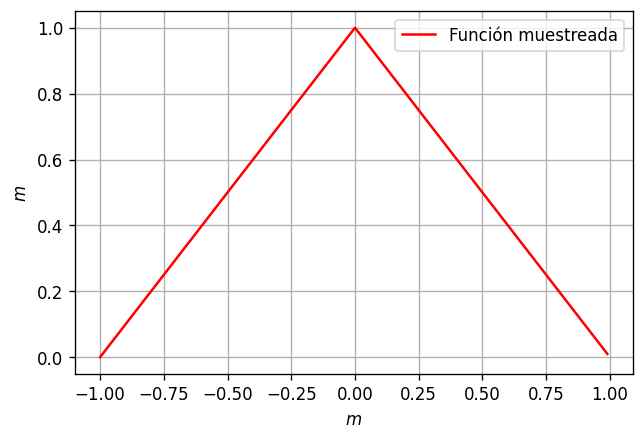

In [ ]:
plt.figure(dpi=120)
plt.plot(x,triangle_function(x,1), color='red', label='Función muestreada' )
plt.xlabel('$m$')
plt.ylabel('$m$')
plt.grid()
plt.legend()

### ***d)*** Compute the FFT. 

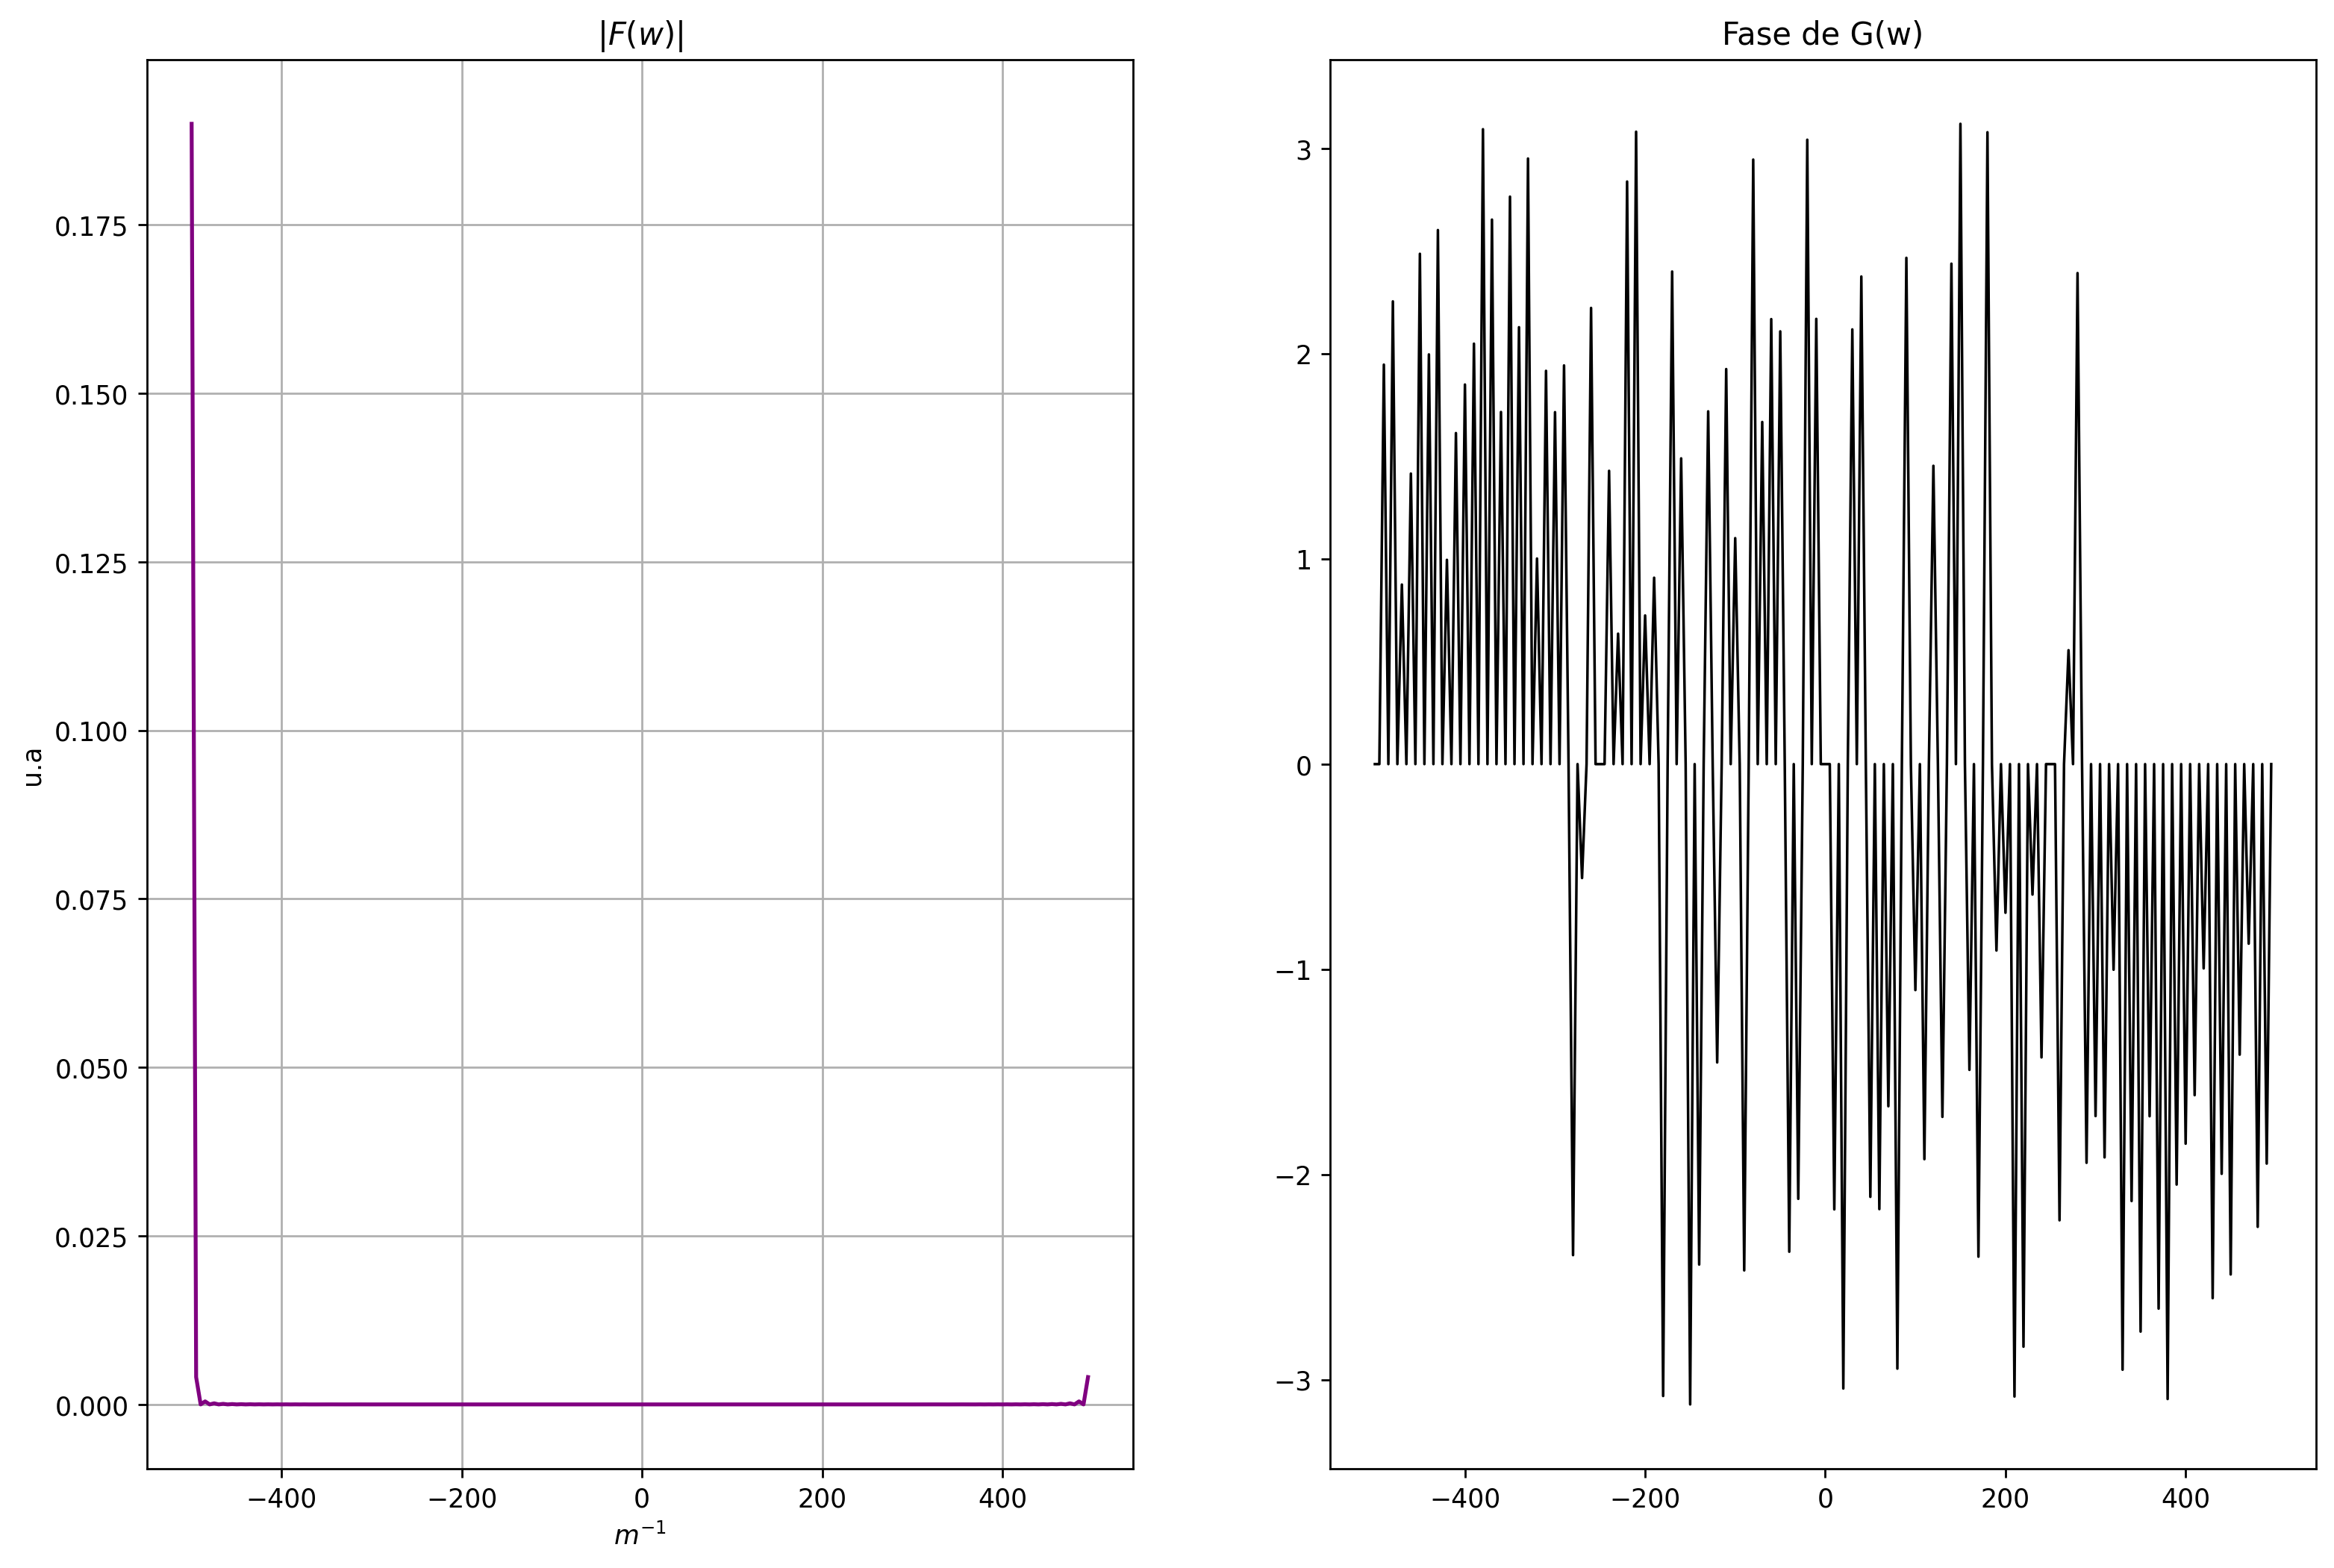

In [ ]:
ys=sft.fftshift(triangle_function(x,1))
fy=sft.fft(ys)*dx 
fyy = sft.fftshift(fy)

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=250) 
ax1.plot(fx,np.abs(fy),color='purple')
#ax1.plot(fx, fyy,color='purple')  ---> Sería para reprentar la función shifteada
ax1.title.set_text('$|F(w)|$')
ax1.set_xlabel('$m^{-1}$')
ax1.set_ylabel('u.a')
ax1.grid()

ax2.plot(fx,np.angle(fy),linewidth=1, color='black')
ax2.title.set_text('Fase de G(w)')


### ***e)***  Find the analytic Fourier transform of the function in (b).

Para resolver este punto utilizaremos lo encontrado en la tarea #2: 

La transformada de Fourier de la función triangular nos dio: 
$$F{[\Lambda(x)}] = sinc^2(f_x)$$

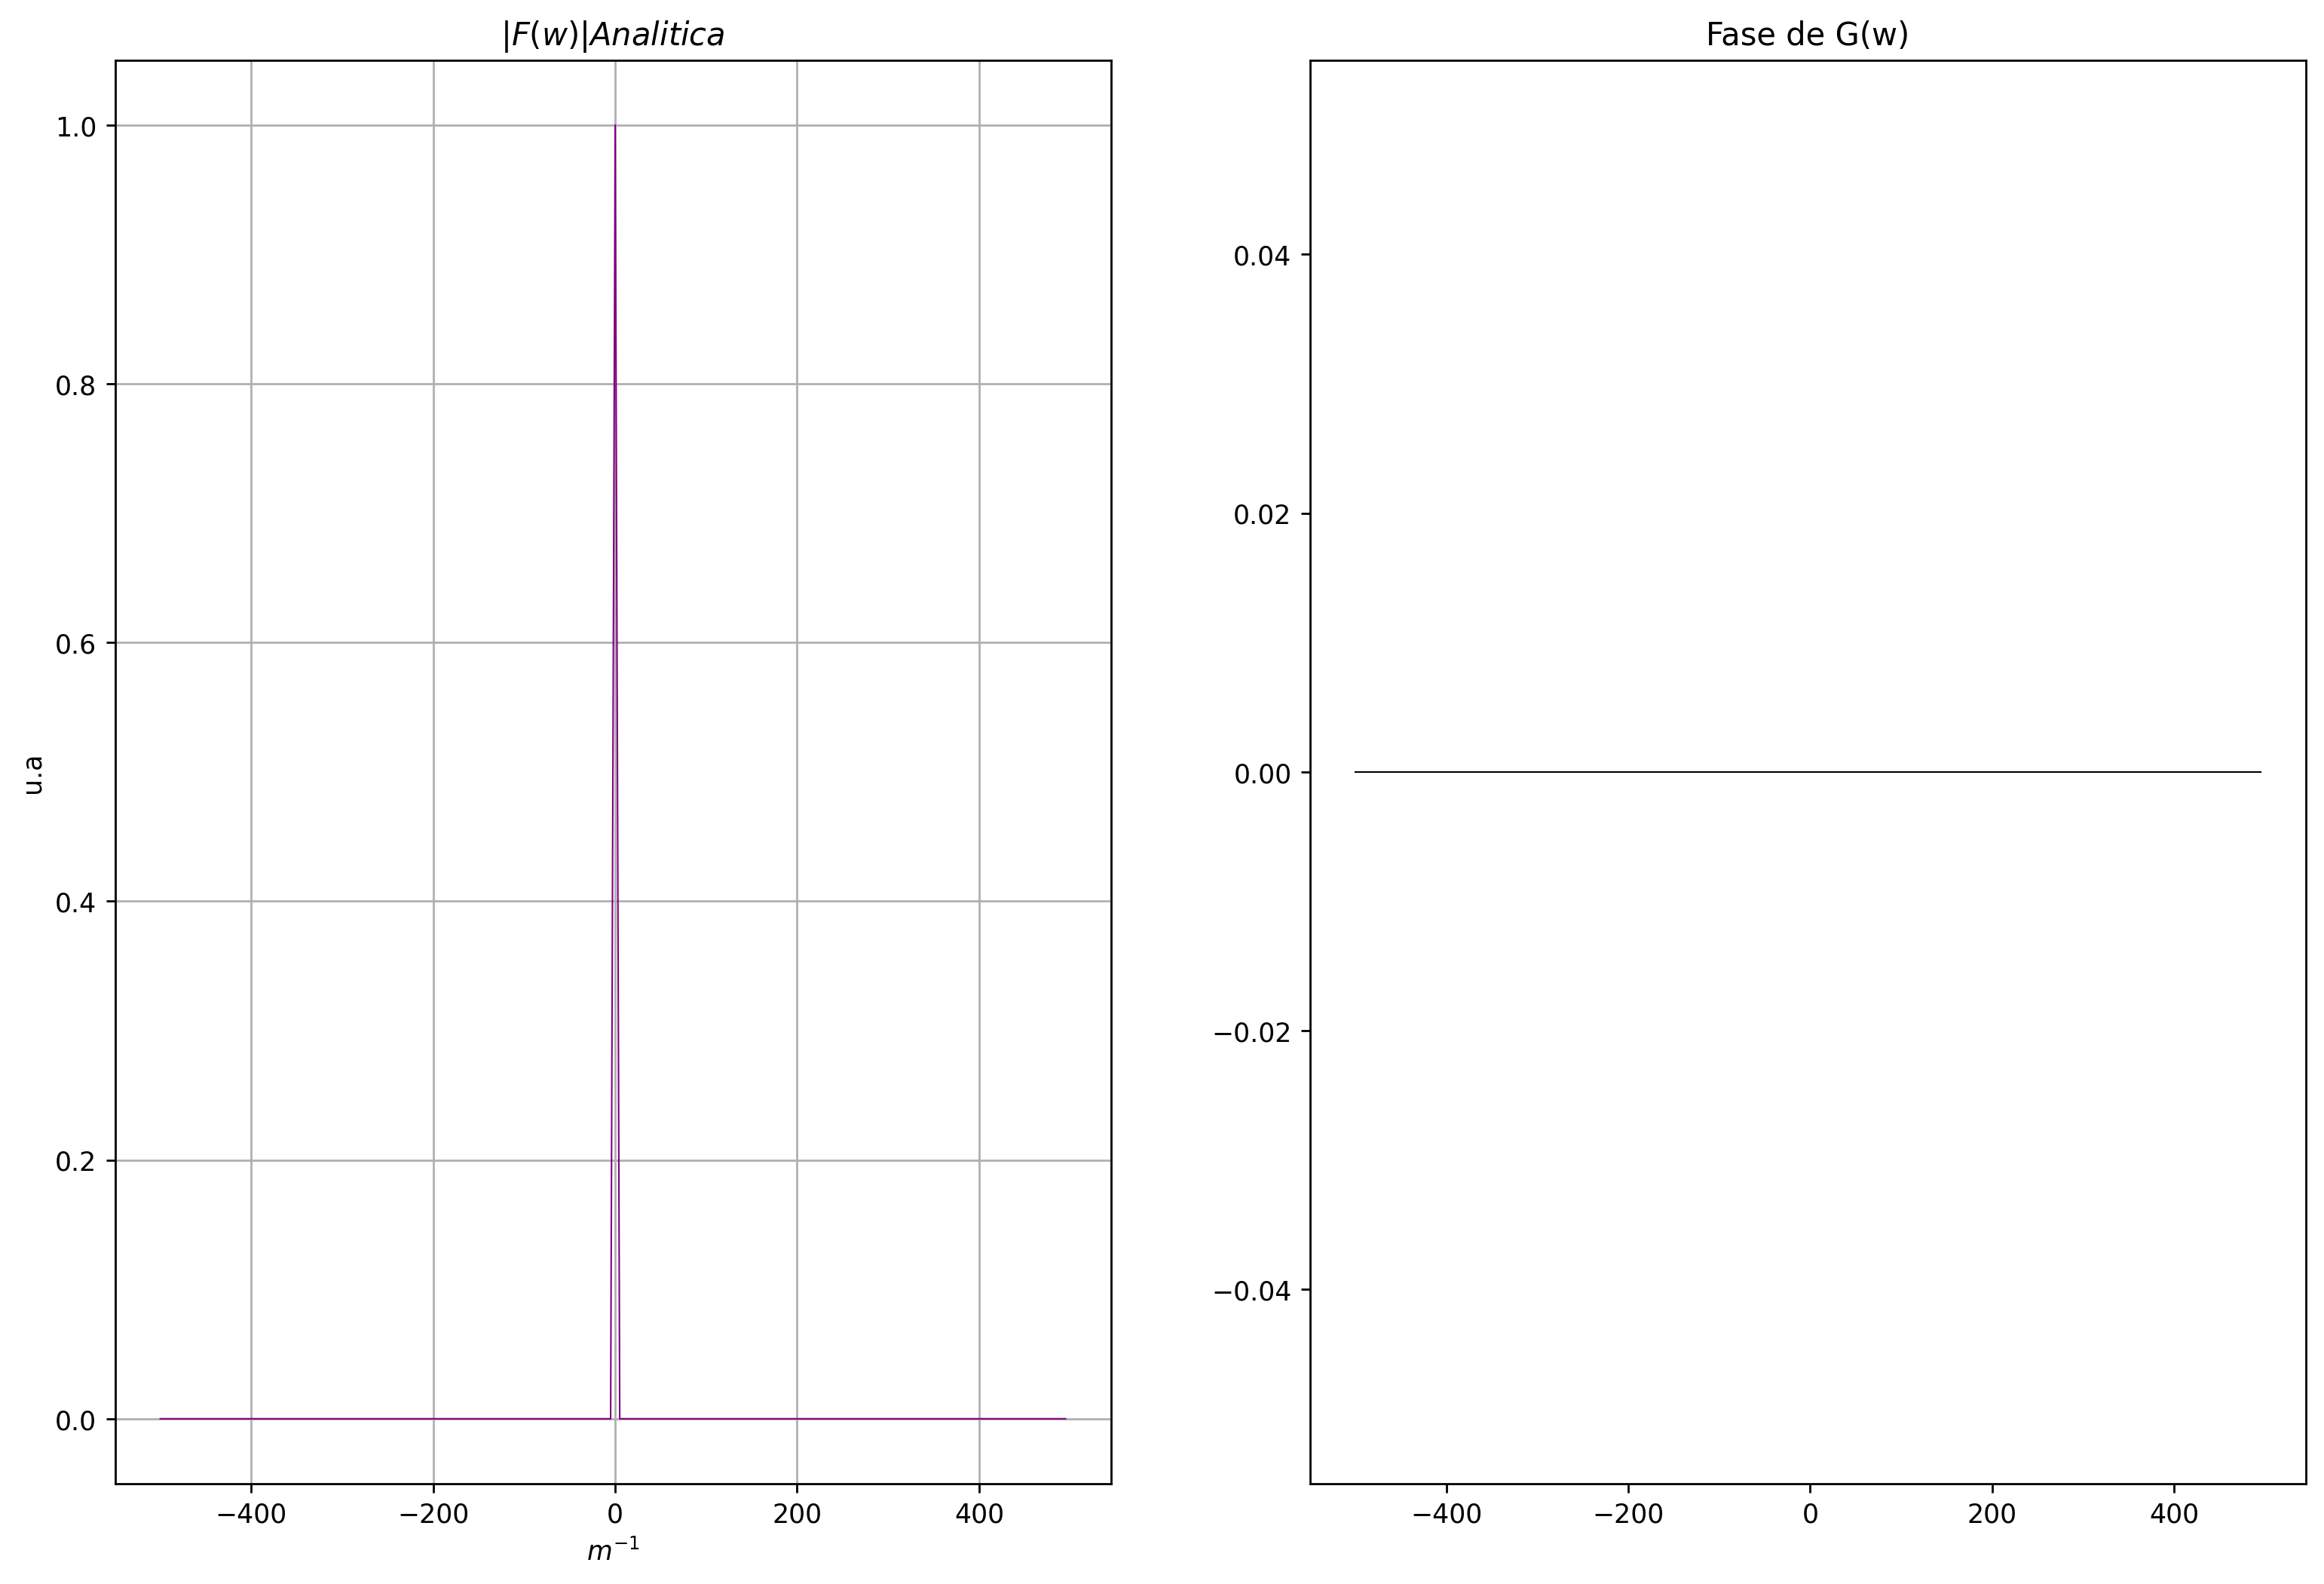

In [ ]:
fya = (np.sinc(fx))**2


fig, (ax1, ax2) = plt.subplots(1, 2,dpi=250) 
ax1.plot(fx,np.abs(fya),color='purple',linewidth=0.6)
ax1.title.set_text('$|F(w)| Analitica$')
ax1.set_xlabel('$m^{-1}$')
ax1.set_ylabel('u.a')
ax1.grid()

ax2.plot(fx,np.angle(fya),linewidth=0.6, color='black')
ax2.title.set_text('Fase de G(w)')

#plt.figure(dpi=120)
#plt.title('Espectro analitico')
#plt.xlabel('m^{-1}')
#plt.ylabel('u.a')
#plt.plot(fx,np.abs(fya),linewidth=1,linestyle='--',label='espectro analitico')
#plt.grid()
#plt.legend()

### ***f)*** Plot the FFT and analytic Fourier transform results together (both magnitude and phase).

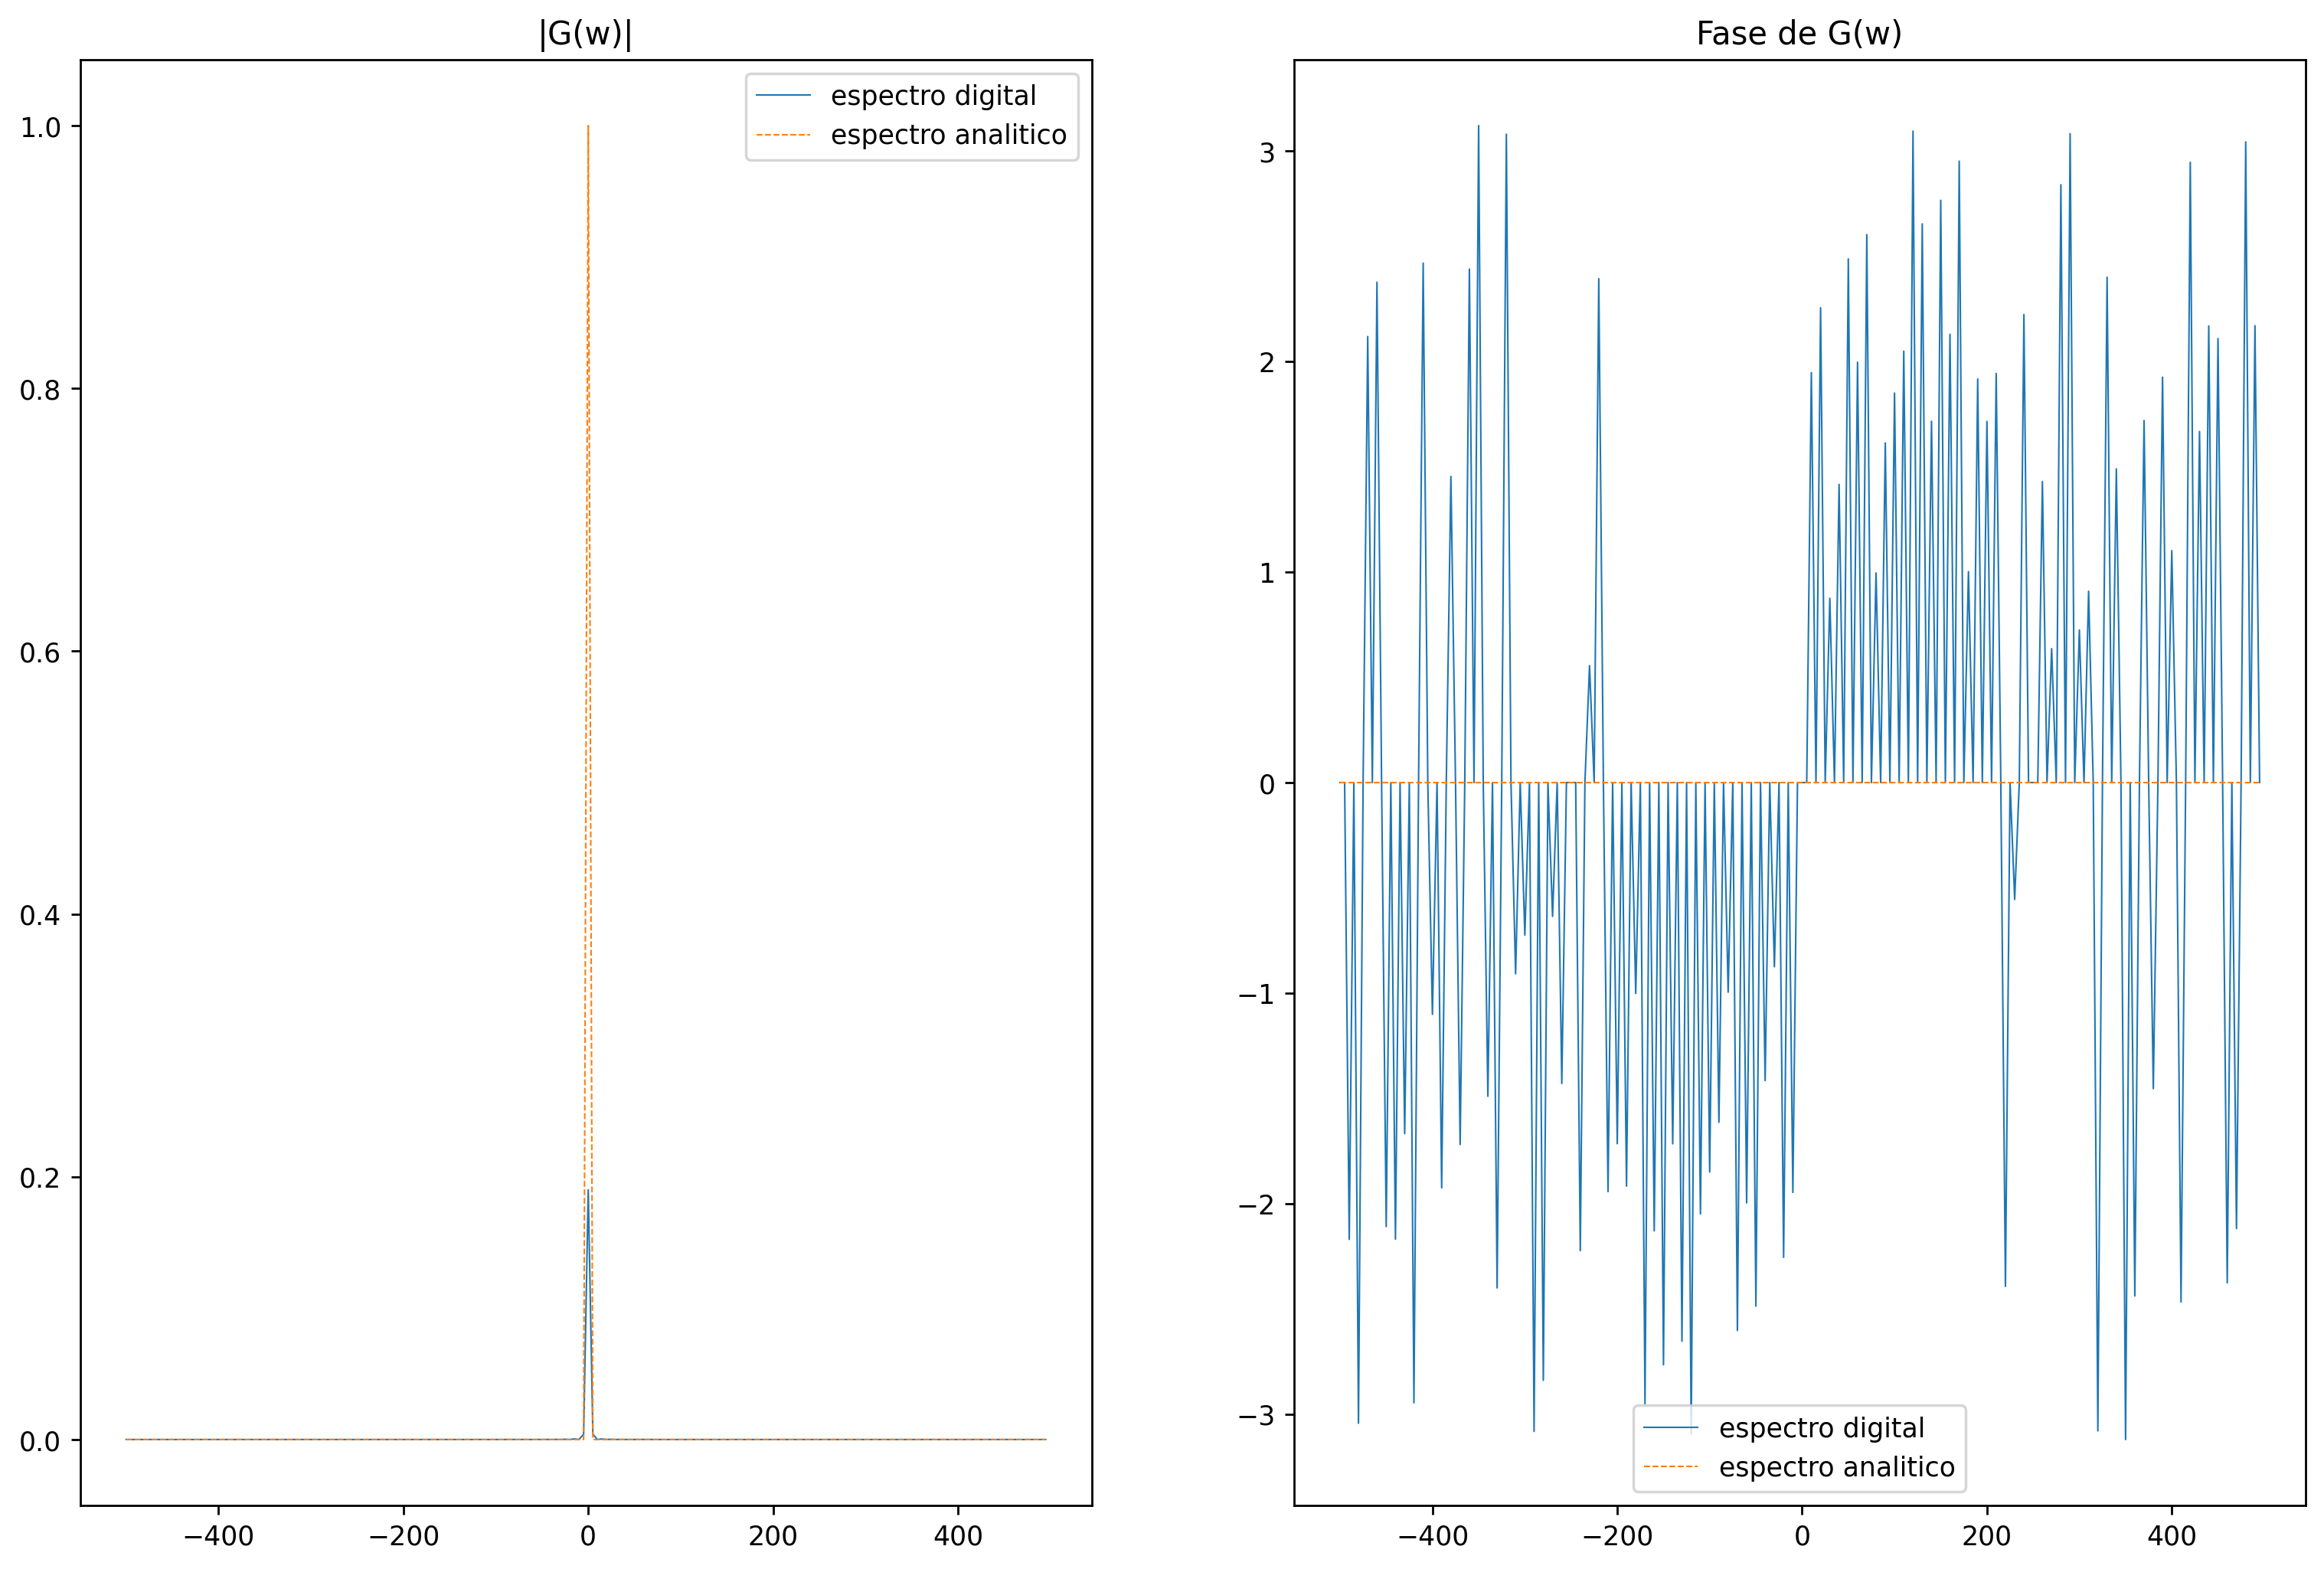

In [ ]:
fy=sft.fftshift(sft.fft(ys)*dx)
fya=(np.sinc(fx))**2

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=250) 
ax1.plot(fx,np.abs(fy),linewidth=0.6,label='espectro digital')
ax1.title.set_text('|G(w)|')
ax1.plot(fx,np.abs(fya),linewidth=0.6,linestyle='--',label='espectro analitico')

ax2.plot(fx,np.angle(fy),linewidth=0.6,label='espectro digital')
ax2.plot(fx,np.angle(fya),linewidth=0.6,linestyle='--',label='espectro analitico')
ax2.title.set_text('Fase de G(w)')
ax1.legend(loc='best')
ax2.legend(loc='best')

Podemos ver que tiene la misma forma, pero diferente amplitud. Esto concuerda con la teoría que hemos visto. 

## Ejercicio 3.2: 

Code the example for the convolution of the Gaussian functions presented in Section 3.6. Find the analytic convolution of these functions and compare this result with the discrete result in a plot.

La convolución que se presenta en el libro de Voelz, es entre dos funciones Gaussianas de diferente ancho. 

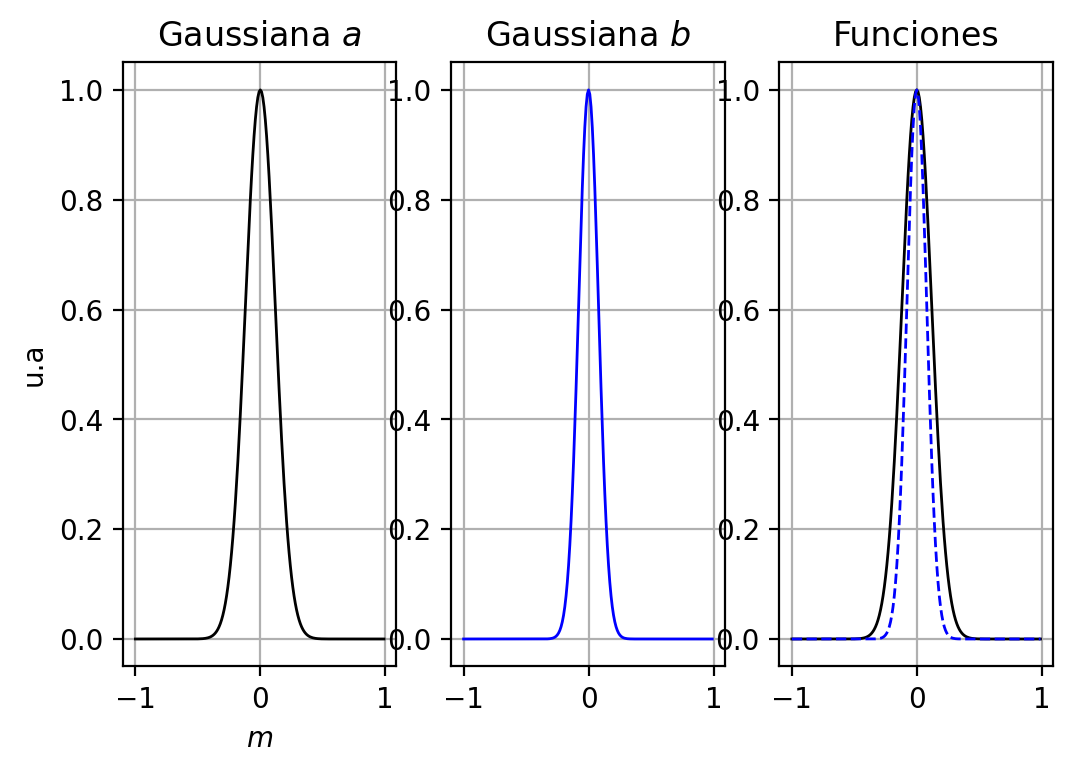

In [ ]:
wa = 0.3 #Ancho medio para la gaussiana -->1
wb = 0.2 #Ancho medio para la gaussiana -->2

L = 2    #Longitud dada en metros
M =200   # Número de muestras
dx = L/M #Muestreo 

xmin = -L/2 
xmax = L/2

#Creemos el vector coord. En el espacio coord. 

x = np.arange(xmin,xmax, dx)

#Creemos el vector coord. En el espacio frecuencial. 
fxmin = -1/(2*dx)
fxmax = 1/(2*dx) - (1/L)
df = (1/L)
fx= np.arange(fxmin, fxmax, df)


#Definamos las dos Gaussianas: 
fa = np.exp(-(np.pi * x**2)/(wa**2)) #Gaussiana a
fb = np.exp(-(np.pi * x**2)/(wb**2)) #Gaussiana b

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,dpi=200) 
ax1.plot(x,fa,color='black', linewidth=1)
ax1.title.set_text('Gaussiana $a$')
ax1.set_xlabel('$m$')
ax1.set_ylabel('u.a')
ax1.grid()

ax2.plot(x,fb,linewidth=1, color='blue')
ax2.grid()
ax1.set_xlabel('$m$')
ax2.title.set_text('Gaussiana $b$')

ax3.plot(x,fa,color='black', linewidth=1)
ax3.plot(x,fb,linestyle='--',linewidth=1, color='blue')
ax1.set_xlabel('$m$')
ax3.title.set_text('Funciones')
ax3.grid()

No handles with labels found to put in legend.


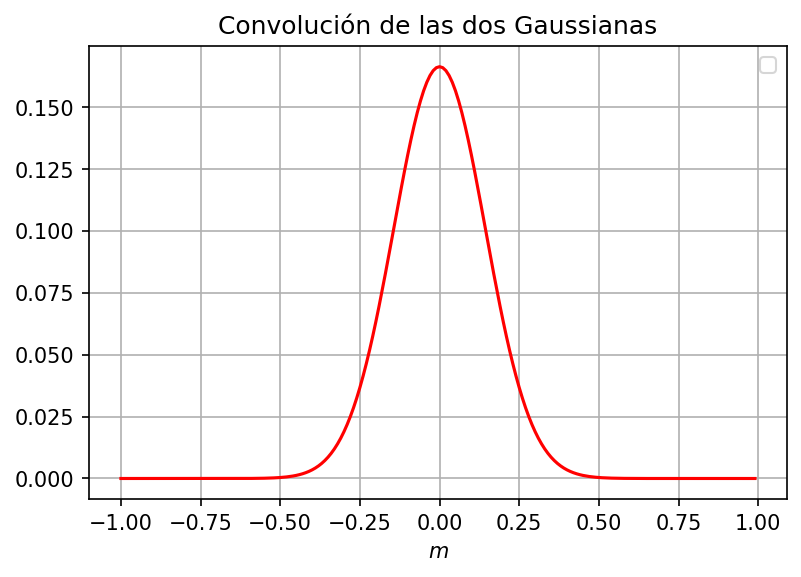

In [ ]:
Fa = sft.fftshift(sft.fft(sft.fftshift(fa))) #Transformada de Fourier sobre la gaussiana a
Fb = sft.fftshift(sft.fft(sft.fftshift(fb))) #Transformada de Fourier sobre la gaussiana b 

ff = Fa * Fb 

rz=sft.fftshift(sft.ifft(ff))*dx

plt.figure(dpi=150)
plt.title('Convolución de las dos Gaussianas')
plt.plot(x, np.abs(rz), color='red')
plt.grid()
plt.xlabel('$m$')
plt.legend()

Ahora enfoquemonos en hacer el desarrollo analitico, la convolución de forma analitica entre dos gaussianas se anexa en el pdf de la tarea. En general, para una gaussiana $f = \exp{-\pi \frac{x^2}{w_a^2}}$ y la gaussiana $g = \exp{-\pi \frac{x^2}{w_b^2}}$, la convolución entre estas dos funciones nos dio: 
$$(f*g)(x) = \frac{w_aw_b}{\sqrt{w_a^2 + w_b^2}}\exp{ [-\pi \frac{x^2}{w_a^2 + w_b^2}] }$$, la implementación computacional se realiza utilizando la última expresión

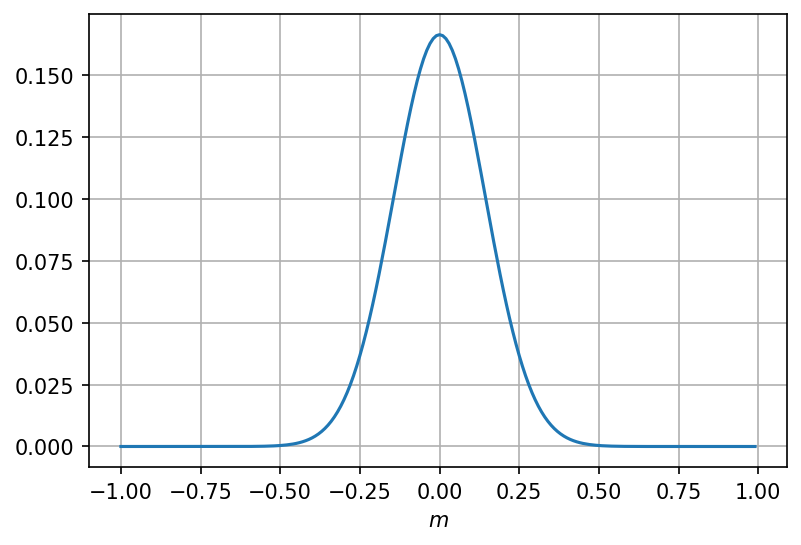

In [ ]:
def convolution(x):
    wb = 0.2
    wa = 0.3
    const = (wa*wb)/(np.sqrt(wa**2+wb**2)) 
    
    return const*np.exp((-np.pi*x**2)/(wa**2+wb**2))

L = 2
M = 200
dx = L/M
xmin = -L/2
xmax=  L/2
xeval = np.arange(xmin,xmax,dx)

plt.figure(dpi=150)
plt.plot(xeval,convolution(xeval))
plt.xlabel('$m$')
plt.grid()

Comparemos las dos formas, para mirar que similitud tienen: 

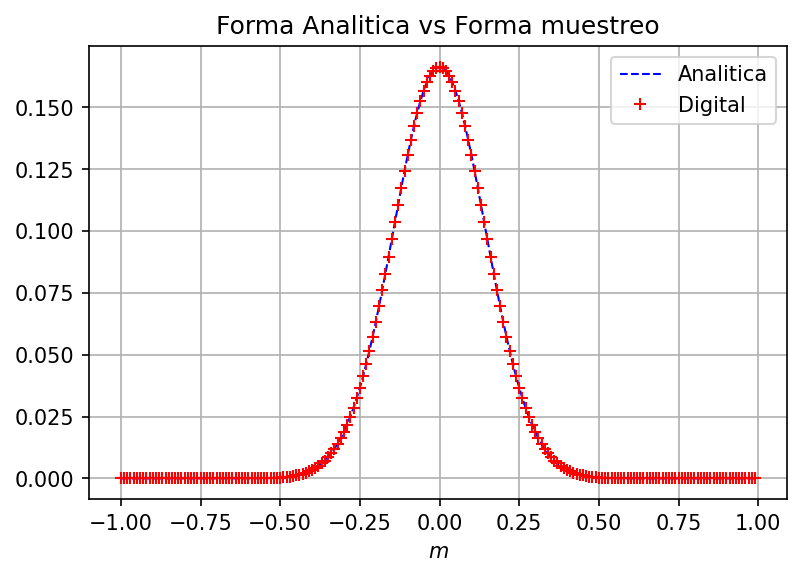

In [ ]:
plt.figure(dpi=150)
plt.title('Forma Analitica vs Forma muestreo')
plt.plot(x, convolution(xeval),linestyle='--',linewidth=1, color='blue', label='Analitica')
plt.plot(x, np.abs(rz),'+', color='red', label='Digital')
plt.grid()
plt.xlabel('$m$')
plt.legend()

## Ejercicio 3.3: Circle function M-file:

### ***a)*** Create a circle function in an M-file.

Tomemos como definición de la función circle la del libro de Goodman: 

$$Circ(r) = \left\{\begin{matrix}
1 & r<\frac{1}{2} & \\ 
\frac{1}{2} & r =\frac{1}{2}  & \\ 
0 & otherwise & 
\end{matrix}\right.$$

Recordando que $r = \sqrt{x^2 + y^2}$

In [ ]:
def circ(r, Lx, Ly, M):
  #Vector para eje x
  dx=Lx/M
  xmin=-Lx/2
  xmax=Lx/2
  fxmax=1/(2*dx)
  fxmin=-1/(2*dx)
  dfx=1/Lx
  #Vector para eje y
  dy=Ly/M
  ymin=-Ly/2
  ymax=Ly/2
  fymax=1/(2*dy)
  fymin=-1/(2*dy)
  dfy=1/Ly
  #Arreglos
  x = np.arange(xmin,xmax,dx)
  y = np.arange(ymin, ymax,dy)
  fx=np.arange(fxmin,fxmax,dfx) 
  fy=np.arange(fymin,fymax,dfy) 

  #Creamos el meshgrid, espacial
  xx, yy=np.meshgrid(x,y)
  #Creamos el meshgrid, frecuencial
  fxx, fyy=np.meshgrid(fx,fy)

  #Creamos un arreglo vacío: 
  z = np.zeros((200,200))

  for i in range(0, 200):
    for j in range(0,200): 
      if xx[i,j]**2 + yy[i,j]**2<(r**2):
        z[i,j] = 1
      elif xx[i,j]**2 + yy[i,j]**2==(r**2): 
        z[i,j] = 1/2
      else:
        z[i,j]=0
  return z

### ***b)*** Generate a sampled circle function in a 2D array with the following parameters: circle radius $= 0.015$ m, array side length $= 0.2$ m, and number of samples (one dimension) $M = 200$.

In [ ]:
r = 0.015
Lx = 0.2
Ly = 0.2
M=200

dx=Lx/M
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx
#Vector para eje y
dy=Ly/M
ymin=-Ly/2
ymax=Ly/2
fymax=1/(2*dy)
fymin=-1/(2*dy)
dfy=1/Ly
#Arreglos
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin, ymax,dy)
fx=np.arange(fxmin,fxmax,dfx) 
fy=np.arange(fymin,fymax,dfy) 

#Creamos el meshgrid, espacial
xx, yy=np.meshgrid(x,y)

#Creamos el meshgrid, frecuencial
fxx, fyy=np.meshgrid(fx,fy)

Aunque también puedo muestrear con la función circ() que define arriba, preferí utilizar una sola celda de código para realizar el muestreo 

### ***c)***Display the sampled function as an image

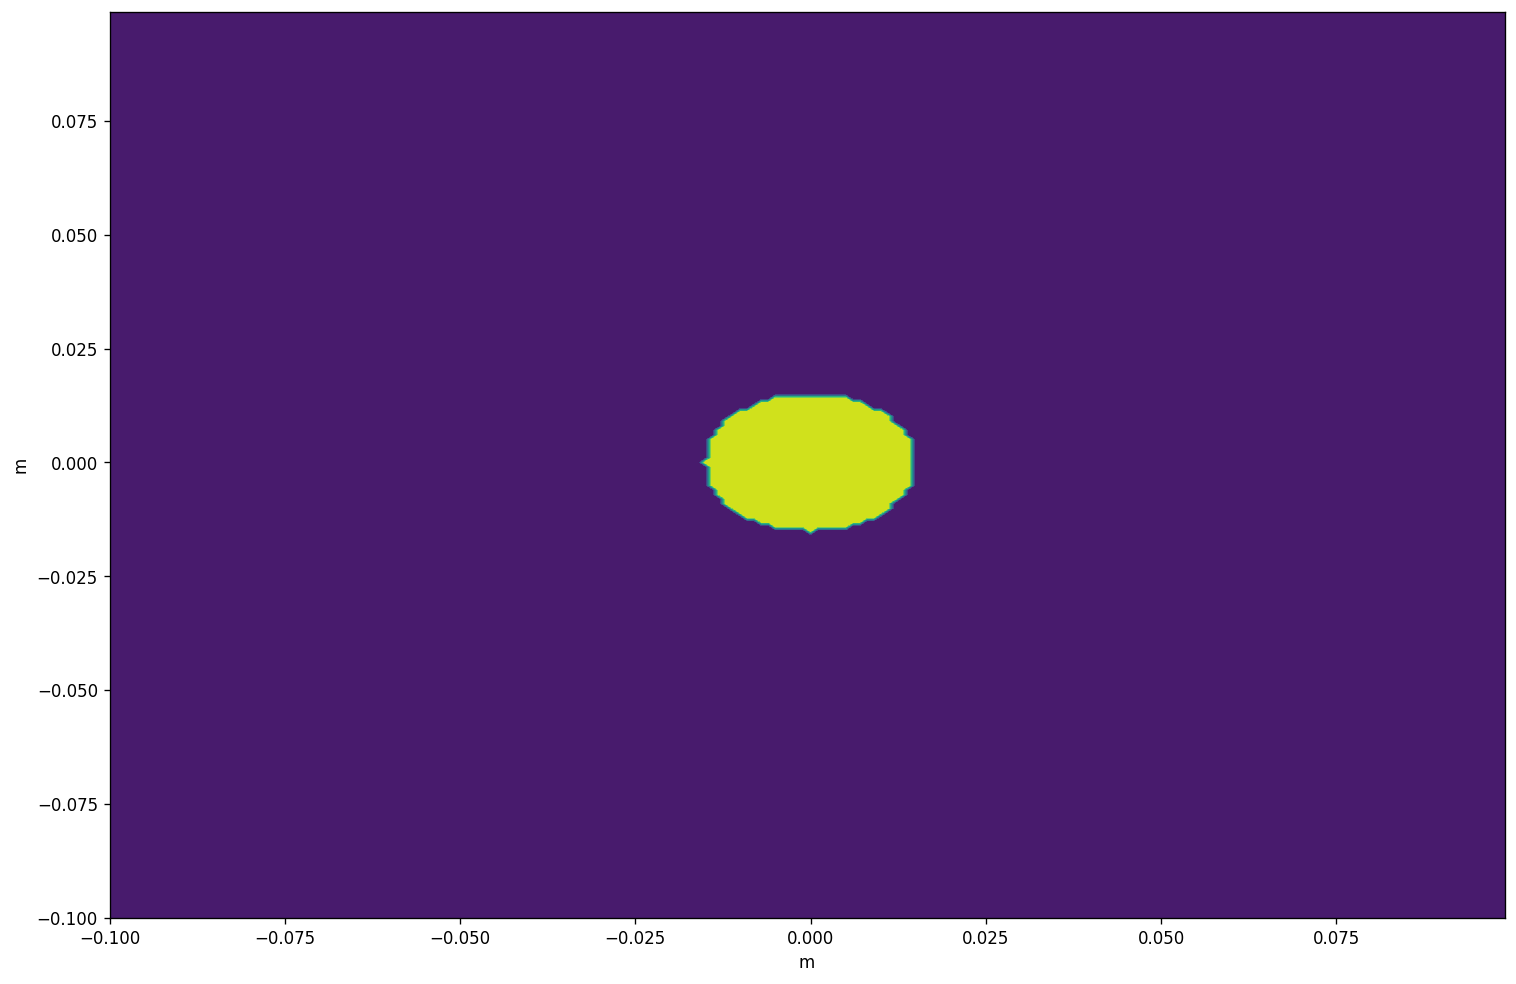

In [ ]:
f = circ(0.015, 0.2, 0.2, 200)

plt.figure(dpi=120)
h = plt.contourf(x,y,f)
plt.xlabel('m')
plt.ylabel('m')
plt.show()

#z=np.sqrt(r**2 - xx**2 - yy**2)
#plt.figure(dpi=120)
#h = plt.contourf(x,y,z)
#plt.show()

### ***d)*** Take the FFT of the array and display the magnitude of the transform in surface and profile plots.

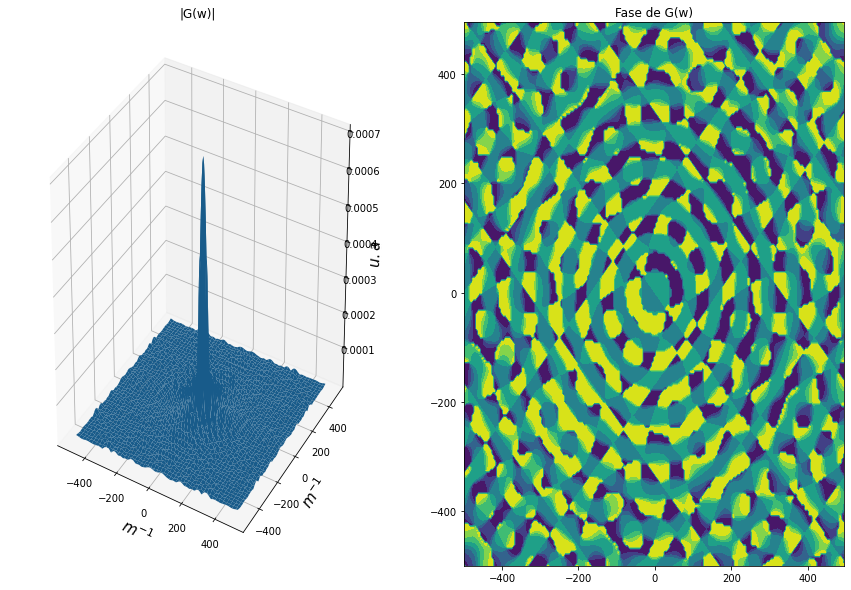

In [ ]:
fz=sft.fftshift(sft.fft2(sft.fftshift(f))*dx*dy)

plt.rcParams['figure.figsize'] = 15, 10

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(fxx,fyy,np.abs(fz))
ax.title.set_text('|G(w)|')
ax.set_xlabel('$m^{-1}$',fontsize=15)
ax.set_ylabel('$m^{-1}$',fontsize=15)
ax.set_zlabel('$u.a$',fontsize=15)




ax = fig.add_subplot(1, 2,2)
ax.contourf(fx,fy,np.angle(fz))
ax.title.set_text('Fase de G(w)')
plt.show()